In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import random
import time
import matplotlib.pyplot as plt 
import re
from itertools import combinations 
import operator
import statistics as stats
import math
import seaborn as sns
import scipy
import sklearn
import sys
import torch.optim as optim

In [122]:
print(torch.__version__)

1.4.0


In [2]:
data = pd.read_csv("E:/Users/Justin/Desktop/Course Folders 2020/practicum/mini proj/DataSet_HAR.csv")

In [3]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
data.shape

(10299, 563)

In [61]:
classes

['STANDING',
 'SITTING',
 'LAYING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

In [73]:
testing_data = data.copy

In [76]:
data['number_class'] = None

In [77]:
data['number_class']

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,number_class
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,None
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,None
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,None
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,None
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,None
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING,None
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING,None
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING,None
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING,None
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING,None


In [74]:
testing_data[testing_data.Activity == 'STANDING'] = 0

AttributeError: 'function' object has no attribute 'Activity'

In [71]:
data[data.Activity == 'STANDING'].corr()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.587461,0.280521,0.273222,0.338793,0.157842,0.354633,0.367459,0.165112,0.304788,...,0.049388,0.043839,-0.170892,0.101822,-0.006486,-0.007687,0.099187,0.046639,0.062748,-0.029564
tBodyAcc-mean()-Y,0.587461,1.000000,0.410578,0.280921,0.385035,0.203194,0.330981,0.421512,0.204210,0.296440,...,0.030495,0.017815,0.023862,0.057821,0.008752,-0.004738,0.040981,0.063229,0.015438,-0.040686
tBodyAcc-mean()-Z,0.280521,0.410578,1.000000,0.312555,0.259613,0.260668,0.345414,0.281697,0.273590,0.311565,...,0.018570,-0.004948,0.042355,0.048767,-0.041539,0.025916,0.026189,0.009779,0.051780,-0.040337
tBodyAcc-std()-X,0.273222,0.280921,0.312555,1.000000,0.778737,0.780801,0.979250,0.766970,0.763509,0.909628,...,0.305955,0.259409,-0.035108,0.016642,-0.048806,0.025824,0.134815,0.087483,0.050745,-0.095307
tBodyAcc-std()-Y,0.338793,0.385035,0.259613,0.778737,1.000000,0.711415,0.794380,0.992508,0.699741,0.710033,...,0.337498,0.285117,-0.033008,0.052130,-0.018343,0.008773,-0.001761,0.025347,-0.072342,-0.048988
tBodyAcc-std()-Z,0.157842,0.203194,0.260668,0.780801,0.711415,1.000000,0.790485,0.701851,0.995495,0.673511,...,0.288891,0.250745,-0.002393,0.030491,-0.035544,-0.010081,-0.005369,-0.026757,0.010459,-0.070980
tBodyAcc-mad()-X,0.354633,0.330981,0.345414,0.979250,0.794380,0.790485,1.000000,0.791992,0.779023,0.854744,...,0.276337,0.234046,-0.039984,0.033823,-0.046685,0.020376,0.165145,0.100400,0.076352,-0.104184
tBodyAcc-mad()-Y,0.367459,0.421512,0.281697,0.766970,0.992508,0.701851,0.791992,1.000000,0.693875,0.692647,...,0.306285,0.257104,-0.033808,0.053254,-0.019003,0.008638,-0.001714,0.025847,-0.067045,-0.052431
tBodyAcc-mad()-Z,0.165112,0.204210,0.273590,0.763509,0.699741,0.995495,0.779023,0.693875,1.000000,0.649060,...,0.273690,0.237870,-0.001796,0.029476,-0.035477,-0.012100,-0.006454,-0.026919,0.013576,-0.070695
tBodyAcc-max()-X,0.304788,0.296440,0.311565,0.909628,0.710033,0.673511,0.854744,0.692647,0.649060,1.000000,...,0.314748,0.262940,-0.070822,0.036131,-0.037723,0.033179,0.064724,0.040534,0.000172,-0.074052


In [8]:
print(len(data['Activity'].unique().tolist()), '\n')
print(data['Activity'].value_counts())

6 

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64


In [9]:
print(data.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [10]:
classes = data['Activity'].unique().tolist()
classes

['STANDING',
 'SITTING',
 'LAYING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

In [72]:
heat_map = data.corr()
heat_map
#fig = plt.figure(figsize = (12, 9))

#sns.heatmap(correlation_matrix, vmax = 1)
#plt.show()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656,0.020345
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233,-0.001577
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406,0.001981
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063,-0.061397
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511,-0.094486
tBodyAcc-std()-Z,-0.036071,-0.054153,-0.015632,0.861910,0.888259,1.000000,0.855837,0.884999,0.997360,0.859956,...,0.176514,0.147580,-0.009823,-0.015043,-0.004984,-0.012196,-0.353271,0.459092,0.483424,-0.036750
tBodyAcc-mad()-X,0.010303,-0.045247,-0.022872,0.998662,0.918561,0.855837,1.000000,0.912076,0.850538,0.973868,...,0.166656,0.137312,-0.042121,-0.016774,0.027729,-0.027097,-0.371168,0.444926,0.389481,-0.059112
tBodyAcc-mad()-Y,-0.017488,-0.047673,-0.022966,0.916087,0.997510,0.884999,0.912076,1.000000,0.884517,0.904283,...,0.213620,0.185541,-0.024177,-0.006267,-0.002924,-0.013411,-0.378013,0.507947,0.424479,-0.094315
tBodyAcc-mad()-Z,-0.038805,-0.055524,-0.009577,0.856497,0.887052,0.997360,0.850538,0.884517,1.000000,0.853439,...,0.177073,0.149069,-0.011856,-0.015747,-0.009873,-0.012800,-0.355836,0.460345,0.480032,-0.042434
tBodyAcc-max()-X,0.046943,-0.039445,-0.040218,0.981226,0.911137,0.859956,0.973868,0.904283,0.853439,1.000000,...,0.169477,0.136950,-0.031642,-0.018547,0.033533,-0.030908,-0.384244,0.458832,0.402873,-0.058773


In [59]:
test = []
for i in heat_map.index:
    test.append(heat_map[i][561])

In [60]:
test

[0.020345317326463518,
 -0.001577403322829989,
 0.001980695639919026,
 -0.06139691051112709,
 -0.09448551328958733,
 -0.03674959597334224,
 -0.05911167956805671,
 -0.0943151360334852,
 -0.042434452666564045,
 -0.058773395090490566,
 -0.09161216202923159,
 -0.019565456823752908,
 0.07801756409577174,
 0.08822057251225897,
 0.02235569372353299,
 -0.0648695628009129,
 -0.04898972616651642,
 -0.09320388480692031,
 -0.017894554129073665,
 -0.05754044976176449,
 -0.08188127634290182,
 -0.05505022623943322,
 -0.06031490113380762,
 -0.10332007718050955,
 -0.045127280871264996,
 0.046671661965403455,
 -0.09189632522053506,
 0.0528115750297316,
 0.03799113471272908,
 0.04247960180407113,
 -0.08533729633528093,
 0.04304779051252,
 0.019752583424468593,
 0.05503356025125897,
 -0.05437943103145571,
 -0.005967631206392366,
 0.09973143371400704,
 0.01681982693632171,
 -0.0302935746950965,
 -0.036898034668055205,
 -0.03587189594374357,
 0.04693088852606994,
 0.07376902751872656,
 -0.03572700823395551,

In [9]:
'''
correlation_matrix.index[1:]
#correlation_matrix.index
less_than = 0
counter = 1
for i in correlation_matrix.index[1:]:
    for j in correlation_matrix.loc[i][:counter].tolist():
        if -.4 <= j <= .4:
            less_than += 1
    counter += 1       
correlation_matrix.loc['tBodyAcc-mean()-Y'][:5].tolist()
'''    

In [11]:
correlation_matrix.loc['tBodyAcc-mean()-Y'][:5].tolist()

[0.1280365147948308,
 1.0,
 -0.029881851227768194,
 -0.046351706932790185,
 -0.04699623576125111]

In [80]:
#correlation_matrix
activity_means = data.groupby('Activity').mean()
activity_medians = data.groupby('Activity').median()
activity_maximums = data.groupby('Activity').max()
activity_minimums = data.groupby('Activity').min()

In [13]:
grouped = data.groupby('Activity')

In [14]:
activity_stats = {}
for i in classes:
    activity_stats[i] = None

In [15]:
activity_stats

{'STANDING': None,
 'SITTING': None,
 'LAYING': None,
 'WALKING': None,
 'WALKING_DOWNSTAIRS': None,
 'WALKING_UPSTAIRS': None}

In [81]:
laying_means = activity_means.loc['LAYING'][:-1]
laying_medians = activity_medians.loc['LAYING'][:-1]
laying_maximums = activity_maximums.loc['LAYING'][:-1]
laying_minimums = activity_minimums.loc['LAYING'][:-1]

In [82]:
standing_means = activity_means.loc['STANDING'][:-1]
standing_medians = activity_medians.loc['STANDING'][:-1]
standing_maximums = activity_maximums.loc['STANDING'][:-1]
standing_minimums = activity_minimums.loc['STANDING'][:-1]

In [83]:
sitting_means = activity_means.loc['SITTING'][:-1]
sitting_medians = activity_medians.loc['SITTING'][:-1]
sitting_maximums = activity_maximums.loc['SITTING'][:-1]
sitting_minimums = activity_minimums.loc['SITTING'][:-1]

In [84]:
walking_means = activity_means.loc['WALKING'][:-1]
walking_medians = activity_medians.loc['WALKING'][:-1]
walking_maximums = activity_maximums.loc['WALKING'][:-1]
walking_minimums = activity_minimums.loc['WALKING'][:-1]

In [85]:
walkingdownstairs_means = activity_means.loc['WALKING_DOWNSTAIRS'][:-1]
walkingdownstairs_medians = activity_medians.loc['WALKING_DOWNSTAIRS'][:-1]
walkingdownstairs_maximums = activity_maximums.loc['WALKING_DOWNSTAIRS'][:-1]
walkingdownstairs_minimums = activity_minimums.loc['WALKING_DOWNSTAIRS'][:-1]

In [86]:
walkingupstairs_means = activity_means.loc['WALKING_UPSTAIRS'][:-1]
walkingupstairs_medians = activity_medians.loc['WALKING_UPSTAIRS'][:-1]
walkingupstairs_maximums = activity_maximums.loc['WALKING_UPSTAIRS'][:-1]
walkingupstairs_minimums = activity_minimums.loc['WALKING_UPSTAIRS'][:-1]

In [22]:
sub = []
for activity in classes:
    
    sub.append(grouped.mean().loc[activity][:-1])
    sub.append(grouped.median().loc[activity][:-1])
    sub.append(grouped.max().loc[activity][:-1])
    sub.append(grouped.min().loc[activity][:-1])
    
    activity_stats[activity] = sub
    sub = []

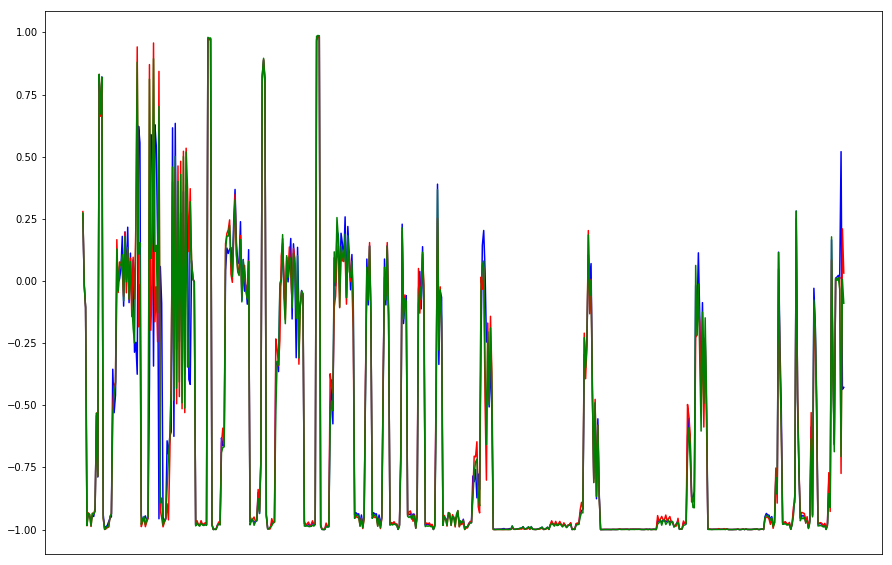

In [23]:
fig= plt.figure(figsize=(15,10))

plt.plot(laying_means, label = 'avg', color = 'b')
plt.plot(standing_means, color = 'r')
plt.plot(sitting_means, color = 'g')
#plt.plot(laying_medians, label = 'med', color = 'y')
#plt.plot(laying_maximums, label = 'max', color = 'r')
#plt.plot(laying_minimums, label = 'min', color = 'g')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)


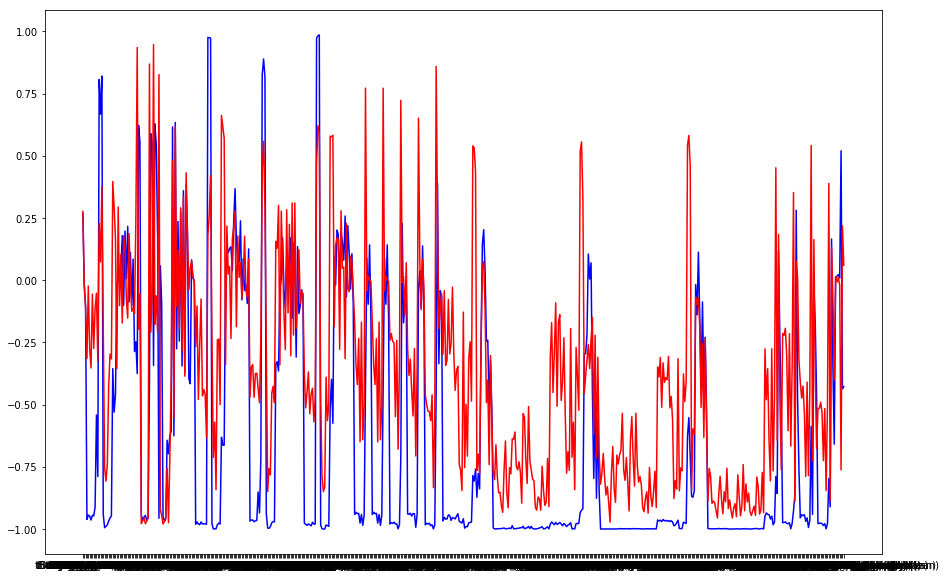

In [88]:
fig= plt.figure(figsize=(15,10))

plt.plot(laying_means, color = 'b')
plt.plot(walking_means, color = 'r')
#plt.title('Neural Network Accuracy vs Epoch', fontsize=20)
#plt.xlabel('Epochs', fontsize=15)
#plt.ylabel('Accuracy', fontsize=15)

In [ ]:
fig= plt.figure(figsize=(15,10))

plt.plot(laying_means, color = 'b')
plt.plot(walking_means, color = 'r')

In [ ]:
fig= plt.figure(figsize=(15,10))

plt.plot(laying_means, color = 'b')
plt.plot(walking_means, color = 'r')

In [13]:
from sklearn.model_selection import train_test_split

In [11]:
columns = data.columns.tolist()

In [14]:
X = data[[c for c in columns[:-2]]]
Y = data[['Activity']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state = 1)

# K-NN

In [31]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [31]:
nbrs = NearestNeighbors(n_neighbors=2).fit(X)

distances, indices = nbrs.kneighbors(X)

In [15]:
labels = data['Activity'].tolist()

In [34]:
confusion_matrix = torch.zeros(6, 6)
accuracy = 0

for i in indices:
    
    if labels[i[0]] == labels[i[1]]:
        accuracy += 1
    
    confusion_matrix[classes.index(labels[i[0]])][classes.index(labels[i[1]])] += 1
    
print(accuracy)
print(confusion_matrix)

10038
tensor([[1.7750e+03, 1.3100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.1300e+02, 1.6630e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.9440e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7180e+03, 2.0000e+00, 2.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 1.3960e+03, 6.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.5420e+03]])


In [36]:
'''
acc_list = []

for k in range(2, 50):
    
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)

    distances, indices = nbrs.kneighbors(X)
    
    labels = data['Activity']

    classified_list = []
    
    accuracy = 0
    
    for i in range(data.shape[0]):
        
        labels_dict = {x : 0 for x in classes}
         
        for j in indices[i][1:]:
            labels_dict[labels.loc[j]] += 1
            
        predicted = max(labels_dict, key=labels_dict.get)
        
        if predicted == labels[i]:
            accuracy += 1
            
    acc_list.append(accuracy/data.shape[0])
    print(accuracy/data.shape[0])

acc_list = torch.tensor(acc_list)
torch.save(acc_list, 'knn_acclist_561.pth')
'''

0.9746577337605593
0.9632003107097776
0.9728128944557725
0.9680551509855326
0.9712593455675308
0.9671812797358967
0.9682493445965628
0.9651422468200797
0.967472570152442
0.9662103116807457
0.9669870861248665
0.9650451500145645
0.9649480532090494
0.963588697931838
0.962520633071172
0.96057869696087
0.9594135352946888
0.958636760850568
0.9577628896009321
0.9581512768229925


KeyboardInterrupt: 

In [ ]:
acc_list = torch.load(acc_list, 'knn_acclist_561.pth')

In [ ]:
fig= plt.figure(figsize=(15,10))

plt.plot(range(25), acc_list, color = 'b')
plt.title('KNN Accuracy cs # Neighbors', fontsize=20)
plt.xlabel('# of Neighbors', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

In [37]:
'''
acc_list = torch.tensor(acc_list)
torch.save(acc_list, 'knn_acclist_561.pth')
'''

# Neural Network

In [ ]:
#https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(561, 300)
        self.fc2 = nn.Linear(300, 180)
        self.fc3 = nn.Linear(180, 120)
        self.fc4 = nn.Linear(120, 52)
        self.fc5 = nn.Linear(52, 6)

        self.relu = nn.ReLU()
        
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        
        return x    

In [17]:
def train(net, optimizer, criterion, epoch):
    
    for _ in range(epoch):
        
        running_loss = 0
        
        for index in X_train.index:
                        
            inputs = torch.tensor(X_train.loc[index]) 
            #labels = class_dict[y_train.loc[index].tolist()[0]]
            label = torch.tensor([classes.index(y_train.loc[index].tolist()[0])])
                        
            #sets gradients to 0
            optimizer.zero_grad()

            #forward
            outputs = net(inputs)
            outputs = torch.reshape(outputs, (1, 6))
            
            #print(label, label.shape)
            #print(outputs, outputs.shape)
                        
            #backward
            loss = criterion(outputs, label)
            loss.backward()
            
            #optimize
            optimizer.step()
            
            running_loss += loss.item()
        print('training loss: ', running_loss/X_train.shape[0])

criterion = nn.CrossEntropyLoss()
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [24]:
def test(net):
    
    with torch.no_grad():
        
        confusion_matrix = torch.zeros(6, 6)
        
        accuracy = 0
        
        for index in X_test.index:
            
            inputs = torch.tensor(X_test.loc[index]) 
            label = torch.tensor(classes.index(y_test.loc[index].tolist()[0]))
            
            outputs = net(inputs)
            predicted = torch.argmax(outputs, dim=0)
            
            #print()
            
            #print(label, predicted)
            confusion_matrix[label][predicted] += 1
            
            if predicted == label:
                accuracy += 1
                
        accuracy /= X_test.shape[0]
        print(accuracy)
        
        #print(confusion_matrix)
        return accuracy, confusion_matrix
                   

In [21]:
classes

['STANDING',
 'SITTING',
 'LAYING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

In [30]:
acc_list = []
current_highest = 0
confusion_matrix = None
for i in range(25):
    
    criterion = nn.CrossEntropyLoss()
    
    net = Net()
    if i != 0:
        net.load_state_dict(torch.load('testing.pth'))
        
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    
    train(net, optimizer, criterion, 1)
    
    torch.save(net.state_dict(), 'testing.pth')
    
    accuracy, c_mat = test(net)
    
    if accuracy > current_highest:
        
        current_highest = accuracy
        confusion_matrix = c_mat
        torch.save(net.state_dict(), 'finalnn.pth')
    
    acc_list.append(accuracy)


training loss:  0.7154206483384168
0.912621359223301
training loss:  0.30544461888082264
0.9029126213592233
training loss:  0.2180076161115851
0.9383495145631068
training loss:  0.17839872863948697
0.9485436893203884
training loss:  0.15035150442892473
0.9344660194174758
training loss:  0.13019839458803245
0.9694174757281553
training loss:  0.13380446566001636
0.9626213592233009
training loss:  0.12093709812900619
0.9718446601941747
training loss:  0.11078825978462965
0.9645631067961165
training loss:  0.10242910182521521
0.9762135922330097
training loss:  0.09278011318193345
0.9655339805825243
training loss:  0.09220728194001292
0.9728155339805825
training loss:  0.09010162330596412
0.9752427184466019
training loss:  0.08608187377455544
0.9728155339805825
training loss:  0.08446143852297877
0.9533980582524272
training loss:  0.07283530340621898
0.9757281553398058
training loss:  0.07862663969023193
0.9791262135922331
training loss:  0.08865042404718662
0.9742718446601941
training loss

Text(0, 0.5, 'Accuracy')

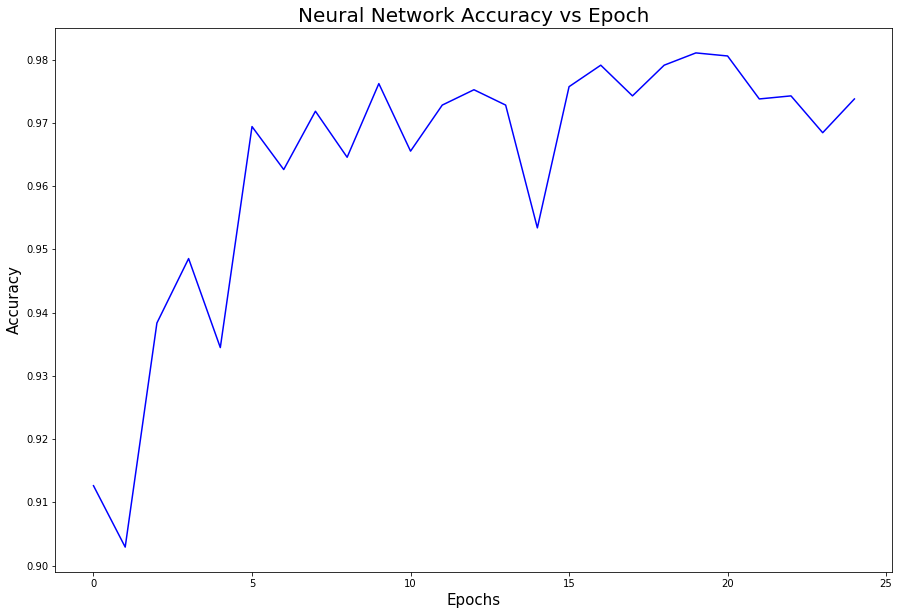

In [39]:
fig= plt.figure(figsize=(15,10))

plt.plot(range(25), acc_list, color = 'b')
plt.title('Neural Network Accuracy vs Epoch', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

In [35]:
confusion_matrix

tensor([[378.,  11.,   0.,   0.,   0.,   0.],
        [ 26., 340.,   0.,   0.,   0.,   0.],
        [  0.,   0., 362.,   0.,   0.,   0.],
        [  0.,   0.,   0., 353.,   0.,   2.],
        [  0.,   0.,   0.,   0., 284.,   0.],
        [  0.,   0.,   0.,   0.,   0., 304.]])

In [43]:
acc_list = torch.tensor(acc_list)
torch.save(acc_list, 'neural_net_acclist.pth')

In [20]:
train(net, optimizer, criterion, 22)
torch.save(net.state_dict(), 'classifier.pth')

training loss:  0.45909645695208573
training loss:  0.262347412039335
training loss:  0.1998374221205414
training loss:  0.1642602197827592
training loss:  0.14498438139366526
training loss:  0.1242355070639939
training loss:  0.1141082399775353
training loss:  0.10343009497010808
training loss:  0.11421188091363386
training loss:  0.09974040947808063
training loss:  0.0924084609602888
training loss:  0.08849027581401069
training loss:  0.1259506652219845
training loss:  0.09063206586926854
training loss:  0.08316779182231386
training loss:  0.0811255443592791
training loss:  0.07839861367937445
training loss:  0.08372047001407285
training loss:  0.06923487342262133
training loss:  0.07454375020929302
training loss:  0.0779616326906618
training loss:  0.07084327241115553


In [25]:
test(net)

0.9524271844660194


(0.9524271844660194, tensor([[385.,   4.,   0.,   0.,   0.,   0.],
         [ 89., 277.,   0.,   0.,   0.,   0.],
         [  0.,   0., 362.,   0.,   0.,   0.],
         [  0.,   0.,   0., 353.,   1.,   1.],
         [  0.,   0.,   0.,   0., 284.,   0.],
         [  0.,   0.,   0.,   0.,   3., 301.]]))

In [46]:
recall = []
count = 0
for i in confusion_matrix:
    recall.append(i[count]/i.sum())
    count += 1

In [47]:
recall

[tensor(0.9717),
 tensor(0.9290),
 tensor(1.),
 tensor(0.9944),
 tensor(1.),
 tensor(1.)]

In [48]:
precision = []
for i in range(6):
    precision.append(confusion_matrix[i][i]/confusion_matrix[..., i].sum())

In [49]:
precision

[tensor(0.9356),
 tensor(0.9687),
 tensor(1.),
 tensor(1.),
 tensor(1.),
 tensor(0.9935)]

In [41]:
torch.argmax(torch.tensor(acc_list))

tensor(19)

In [43]:
acc_list[torch.argmax(torch.tensor(acc_list))]

0.9810679611650486

In [45]:
torch.argmax(torch.tensor(acc_list[:10]))

tensor(9)

In [44]:
acc_list[torch.argmax(torch.tensor(acc_list[:10]))]

0.9762135922330097

# Applying PCA to models

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(.95)

X_pca = pca.fit_transform(X)

In [ ]:
pca = PCA(.99)

X_pca = pca.fit_transform(X)
X_pca.shape

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state = 1)

In [ ]:
###variance of 80% to get 90% accuracy with 11 features
### 0.908340615593747

### variance of 72-73% with 5 features or 4 
### 0.8409554325662686 for 37
### 0.7916302553645985 for 

In [32]:
nbrs = NearestNeighbors(n_neighbors=2).fit(X_pca)

distances, indices = nbrs.kneighbors(X_pca)

In [ ]:
counter = 0
accuracy = 0
for i in indices:
    labels_dict = {x : 0 for x in classes}
    
    for j in i[1:]:
        labels_dict[labels.loc[j]] += 1
        
    predicted = max(labels_dict, key=labels_dict.get)
    
    if predicted == labels[counter]:
        accuracy += 1
    counter += 1
print(accuracy/data.shape[0])

In [34]:
number_of_components = []
accuracy_list = []

for per in range(70, 100):
    pca = PCA(per/100)
    X_pca = pca.fit_transform(X)
    
    number_of_components.append(X_pca.shape[1])
        
    nbrs = NearestNeighbors(n_neighbors=2).fit(X_pca)
    distances, indices = nbrs.kneighbors(X_pca)
    
    counter = 0
    accuracy = 0
    for i in indices:
        labels_dict = {x : 0 for x in classes}

        for j in i[1:]:
            labels_dict[labels[j]] += 1

        predicted = max(labels_dict, key=labels_dict.get)

        if predicted == labels[counter]:
            accuracy += 1
        counter += 1
        
    accuracy_list.append(accuracy/data.shape[0])
    print(number_of_components)
    print(accuracy_list)

[3]
[0.7233712010874842]
[3, 3]
[0.7233712010874842, 0.7233712010874842]
[3, 3, 4]
[0.7233712010874842, 0.7233712010874842, 0.7561899213515876]
[3, 3, 4, 5]
[0.7233712010874842, 0.7233712010874842, 0.7561899213515876, 0.805903485775318]
[3, 3, 4, 5, 5]
[0.7233712010874842, 0.7233712010874842, 0.7561899213515876, 0.805903485775318, 0.805903485775318]
[3, 3, 4, 5, 5, 6]
[0.7233712010874842, 0.7233712010874842, 0.7561899213515876, 0.805903485775318, 0.805903485775318, 0.8437712399262064]
[3, 3, 4, 5, 5, 6, 7]
[0.7233712010874842, 0.7233712010874842, 0.7561899213515876, 0.805903485775318, 0.805903485775318, 0.8437712399262064, 0.8704728614428585]
[3, 3, 4, 5, 5, 6, 7, 8]
[0.7233712010874842, 0.7233712010874842, 0.7561899213515876, 0.805903485775318, 0.805903485775318, 0.8437712399262064, 0.8704728614428585, 0.8790173803281872]
[3, 3, 4, 5, 5, 6, 7, 8, 9]
[0.7233712010874842, 0.7233712010874842, 0.7561899213515876, 0.805903485775318, 0.805903485775318, 0.8437712399262064, 0.8704728614428585

[0.7233712010874842, 0.7233712010874842, 0.7561899213515876, 0.805903485775318, 0.805903485775318, 0.8437712399262064, 0.8704728614428585, 0.8790173803281872, 0.8851344790756384, 0.9001844839304787, 0.9016409360132052, 0.9056219050393242, 0.9178561025342267, 0.9177590057287115, 0.9214486843382853, 0.9205748130886494, 0.9304786872511894, 0.9363044955820954, 0.9390232061365181, 0.9434896591902127, 0.9489270802990581, 0.9530051461306923, 0.9570832119623265, 0.961549665016021, 0.9659190212642004, 0.9667928925138363]
[3, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 20, 22, 25, 28, 32, 36, 40, 45, 52, 59, 69, 81]
[0.7233712010874842, 0.7233712010874842, 0.7561899213515876, 0.805903485775318, 0.805903485775318, 0.8437712399262064, 0.8704728614428585, 0.8790173803281872, 0.8851344790756384, 0.9001844839304787, 0.9016409360132052, 0.9056219050393242, 0.9178561025342267, 0.9177590057287115, 0.9214486843382853, 0.9205748130886494, 0.9304786872511894, 0.9363044955820954, 0.9390232061365181, 0.9

Text(0, 0.5, 'Accuracy')

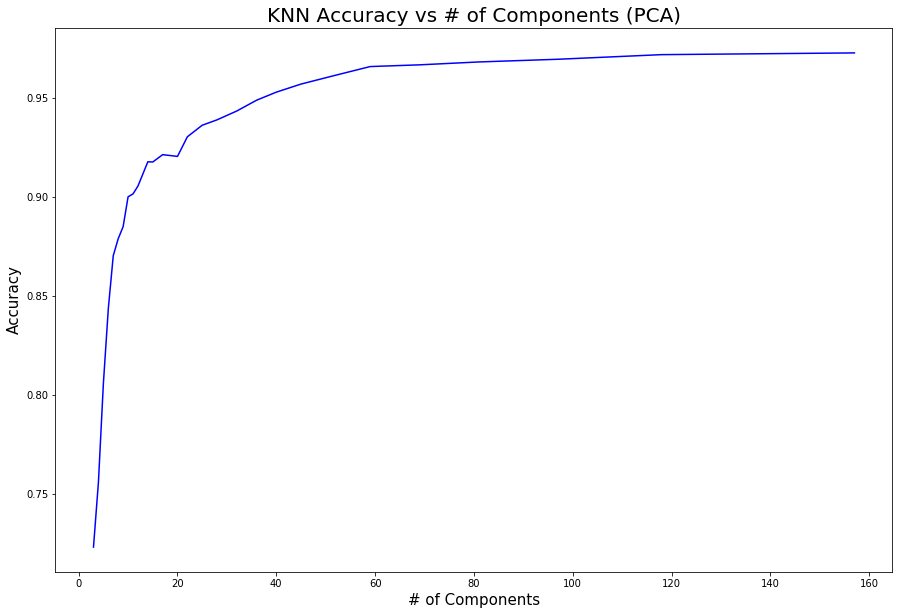

In [51]:
fig= plt.figure(figsize=(15,10))

plt.plot(number_of_components, accuracy_list, color = 'b')
plt.title('KNN Accuracy vs # of Components (PCA)', fontsize=20)
plt.xlabel('# of Components', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

In [ ]:
# 5 components 74% of variance for 80% accuracy
# 10 components 79% of variance for 90% accuracy 

In [ ]:
testing1 = torch.tensor(X_train_pca).type(torch.FloatTensor) 

In [85]:
X_train_pca.shape

(8239, 156)

In [86]:
X_test_pca.shape

(2060, 151)

In [44]:
class Test_Net(nn.Module):
    def __init__(self, input_size):
        super(Test_Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 300)
        self.fc2 = nn.Linear(300, 180)
        self.fc3 = nn.Linear(180, 120)
        self.fc4 = nn.Linear(120, 52)
        self.fc5 = nn.Linear(52, 6)

        self.relu = nn.ReLU()
        
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        
        return x    

In [54]:
torch.tensor(X_train_pca)

tensor([[ 6.0469,  0.5569, -0.4699,  ...,  0.3536,  0.2298,  0.2098],
        [ 5.0055, -1.1785,  0.4815,  ..., -0.0571,  0.1748, -0.0450],
        [-6.2997,  2.6763,  0.3535,  ..., -0.3053,  0.3583,  0.3448],
        ...,
        [-5.9617,  2.3039,  1.6555,  ...,  0.0312,  0.3406, -0.1665],
        [ 3.3934, -1.2272,  0.7953,  ...,  0.2461,  0.1334, -0.1007],
        [-6.1886,  0.8060, -1.8302,  ...,  0.0781, -0.0218, -0.2611]],
       dtype=torch.float64)

In [ ]:
'''
## simulating trades (historical data and live streamed data)
## econ models as opposed to machine learning tools written in R, does not automatically update weights 

'''

In [97]:
pca = PCA(.95)

X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=.2, random_state = 1)

X_train_pca = pd.DataFrame(data=X_train_pca)
X_train_pca.index = X_train.index

X_test_pca = pd.DataFrame(data=X_test_pca)
X_test_pca.index = X_test.index

In [73]:
def train(net, optimizer, criterion, epoch):
    
    for _ in range(epoch):
        
        running_loss = 0
        
        for index in X_train_pca.index:
                        
            inputs = torch.tensor(X_train_pca.loc[index]) 
            #labels = class_dict[y_train.loc[index].tolist()[0]]
            label = torch.tensor([classes.index(y_train.loc[index].tolist()[0])])
            #sets gradients to 0
            optimizer.zero_grad()

            #forward
            outputs = net(inputs)
            outputs = torch.reshape(outputs, (1, 6))
            
            #print(label, label.shape)
            #print(outputs, outputs.shape)
                        
            #backward
            loss = criterion(outputs, label)
            loss.backward()
            
            #optimize
            optimizer.step()
            
            running_loss += loss.item()
        print('training loss: ', running_loss/X_train_pca.shape[0])

In [80]:
def test(net):
    
    with torch.no_grad():
        
        confusion_matrix = torch.zeros(6, 6)
        
        accuracy = 0
        
        for index in X_test_pca.index:
            
            inputs = torch.tensor(X_test_pca.loc[index]) 
            label = torch.tensor(classes.index(y_test.loc[index].tolist()[0]))
            
            outputs = net(inputs)
            predicted = torch.argmax(outputs, dim=0)
            
            
            #print(label, predicted)
            confusion_matrix[label][predicted] += 1
            
            if predicted == label:
                accuracy += 1
                
        accuracy /= X_test_pca.shape[0]
        print(accuracy)
        
        #print(confusion_matrix)
        return accuracy
                   

In [98]:
criterion = nn.CrossEntropyLoss()
net = Test_Net(X_train_pca.shape[1])
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

train(net, optimizer, criterion, 1)
torch.save(net.state_dict(), 'testing1.pth')
test(net)

training loss:  0.4774873171512823
0.9432038834951456


0.9432038834951456

In [107]:
acc_list = []
shape_list = []

In [110]:
last_size = 0
for i in range(99, 69, -1):
    pca = PCA(i/100)
    print(i)
    X_pca = pca.fit_transform(X)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=.2, random_state = 1)

    
    if X_train_pca.shape[1] == last_size:
        continue
        
    else:   
        print(X_train_pca.shape[1])
        shape_list.append(X_train_pca.shape[1])
        X_train_pca = pd.DataFrame(data=X_train_pca)
        X_train_pca.index = X_train.index

        X_test_pca = pd.DataFrame(data=X_test_pca)
        X_test_pca.index = X_test.index

        criterion = nn.CrossEntropyLoss()
        net = Test_Net(X_train_pca.shape[1])
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

        train(net, optimizer, criterion, 1)
    
        torch.save(net.state_dict(), 'testing1.pth')
        
        acc_list.append(test(net))
        
        last_size = X_train.shape[1]
        

99
157
training loss:  0.481868191630681
0.9606796116504854
98
118
training loss:  0.4565004608604095
0.9529126213592233
97
97
training loss:  0.4682231534295982
0.9606796116504854
96
81
training loss:  0.45929530995762086
0.9524271844660194
95
69
training loss:  0.47099493572491785
0.9533980582524272
94
59
training loss:  0.4645448538127805
0.9485436893203884
93
52
training loss:  0.4300958989966799
0.9398058252427185
92
45
training loss:  0.44715682148441366
0.9072815533980583
91
40
training loss:  0.4382580838400243
0.9218446601941748
90
36
training loss:  0.43644149426697604
0.9140776699029126
89
32
training loss:  0.4218057905357746
0.8995145631067961
88
28
training loss:  0.42174493459674656
0.891747572815534
87
25
training loss:  0.4250221511371791
0.8713592233009708
86
22
training loss:  0.4415030596617128
0.8800970873786408
85
20
training loss:  0.4485178335097335
0.8757281553398059
84
17
training loss:  0.4307982721152971
0.8669902912621359
83
15
training loss:  0.44588596398

In [121]:
shape_list.index(157)

30